# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal

def dirac(n=0, N=10):
    if n < 0 or n > N-1:
        raise NameError('n should be in range [0, N-1]')
        return
    
    dirac_seq = np.zeros((N,))
    dirac_seq[n] = 1 
    
    return dirac_seq

def step(n=0, N=20):
    if n < 0 or n > N-1:
        raise NameError('n should be in range [0, N-1]')
        return
    
    step_seq = np.zeros((N,))
    step_seq[n:] = np.ones((N-n,))
    
    return step_seq



Pretty printing has been turned OFF


## Filtering 
**1.1**

/home/masters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10


(<matplotlib.text.Text object at 0x7f316b406b10>, <matplotlib.text.Text object at 0x7f316b479110>)

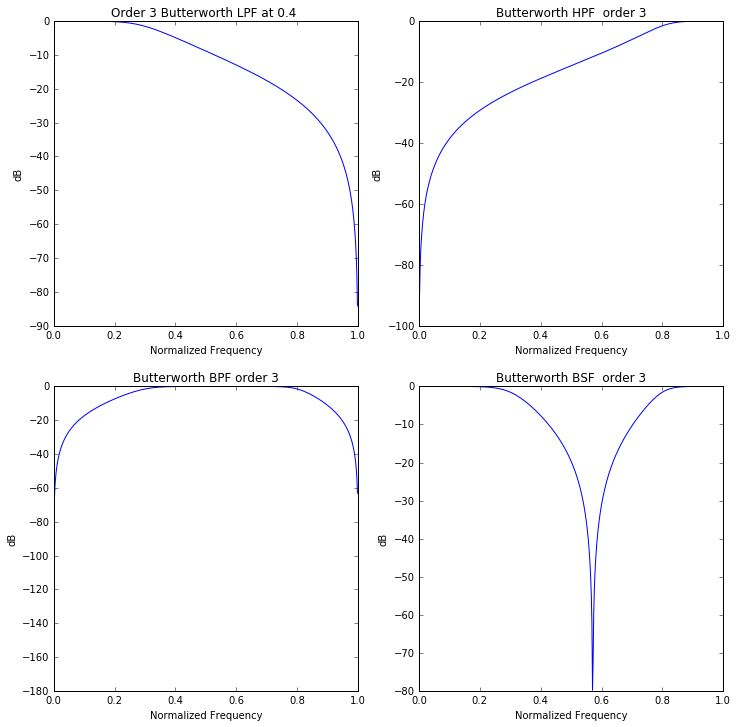

In [2]:
#Butterworth
filter_order = 3
w_cutoff = 0.3
w_pass = 0.8

#lowpass
butt_b1, butt_a1 = signal.butter(filter_order, w_cutoff, btype='lowpass')
butt_w1, butt_h1 = signal.freqz(butt_b1, butt_a1)

#highpass
butt_b2, butt_a2 = signal.butter(filter_order, w_pass, btype='highpass')
butt_w2, butt_h2 = signal.freqz(butt_b2, butt_a2)

#bandpass
butt_b3, butt_a3 = signal.butter(filter_order, [w_cutoff, w_pass], btype='bandpass')
butt_w3, butt_h3 = signal.freqz(butt_b3, butt_a3)

#bandstop
butt_b4, butt_a4 = signal.butter(filter_order, [w_cutoff, w_pass], btype='bandstop')
butt_w4, butt_h4 = signal.freqz(butt_b4, butt_a4)


plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Order 3 Butterworth LPF at 0.4 ')
plt.plot(butt_w1/np.pi, 10*np.log10(np.abs(butt_h1)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,2)
plt.title('Butterworth HPF  order 3')
plt.plot(butt_w2/np.pi, 10*np.log10(np.abs(butt_h2)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,3)
plt.title('Butterworth BPF order 3')
plt.plot(butt_w3/np.pi, 10*np.log10(np.abs(butt_h3)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,4)
plt.title('Butterworth BSF  order 3')
plt.plot(butt_w4/np.pi, 10*np.log10(np.abs(butt_h4)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

/home/masters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10
/home/masters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10


(<matplotlib.text.Text object at 0x7f316b212ed0>, <matplotlib.text.Text object at 0x7f316b208f10>)

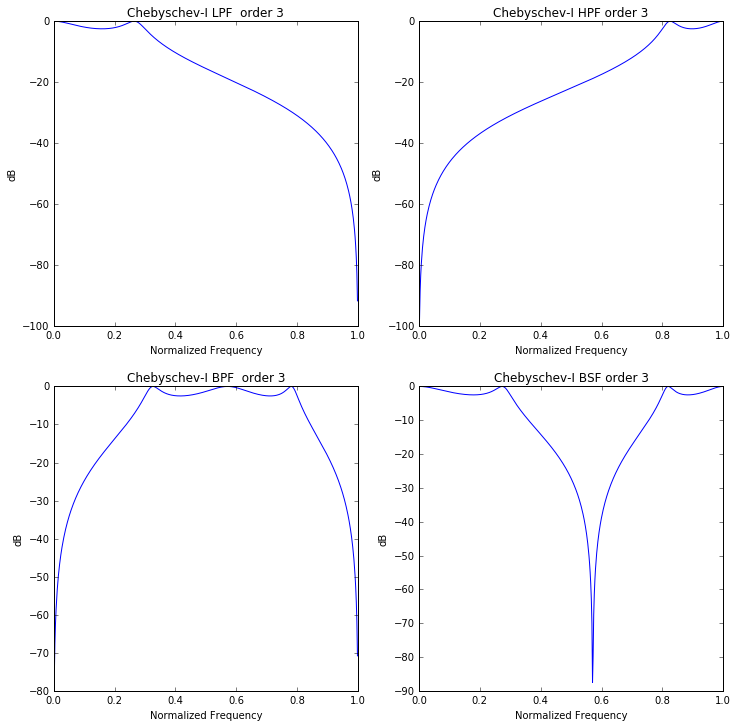

In [3]:
#Chebyschev
filter_order = 3
w_cutoff = 0.3
w_pass = 0.8
max_ripple_db = 5.0

#lowpass
cheb_b1, cheb_a1 = signal.cheby1(filter_order, max_ripple_db, w_cutoff, btype='lowpass')
cheb_w1, cheb_h1 = signal.freqz(cheb_b1, cheb_a1)

#highpass
cheb_b2, cheb_a2 = signal.cheby1(filter_order, max_ripple_db, w_pass, btype='highpass')
cheb_w2, cheb_h2 = signal.freqz(cheb_b2, cheb_a2)

#bandpass
cheb_b3, cheb_a3 = signal.cheby1(filter_order, max_ripple_db, [w_cutoff, w_pass], btype='bandpass')
cheb_w3, cheb_h3 = signal.freqz(cheb_b3, cheb_a3)

#bandstop
cheb_b4, cheb_a4 = signal.cheby1(filter_order, max_ripple_db, [w_cutoff, w_pass], btype='bandstop')
cheb_w4, cheb_h4 = signal.freqz(cheb_b4, cheb_a4)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Chebyschev-I LPF  order 3')
plt.plot(cheb_w1/np.pi, 10*np.log10(np.abs(cheb_h1)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,2)
plt.title('Chebyschev-I HPF order 3')
plt.plot(cheb_w2/np.pi, 10*np.log10(np.abs(cheb_h2)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,3)
plt.title('Chebyschev-I BPF  order 3')
plt.plot(cheb_w3/np.pi, 10*np.log10(np.abs(cheb_h3)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,4)
plt.title('Chebyschev-I BSF order 3')
plt.plot(cheb_w4/np.pi, 10*np.log10(np.abs(cheb_h4)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

**1.2**

(<matplotlib.text.Text object at 0x7f316aeb4090>, <matplotlib.text.Text object at 0x7f316ae9f150>)

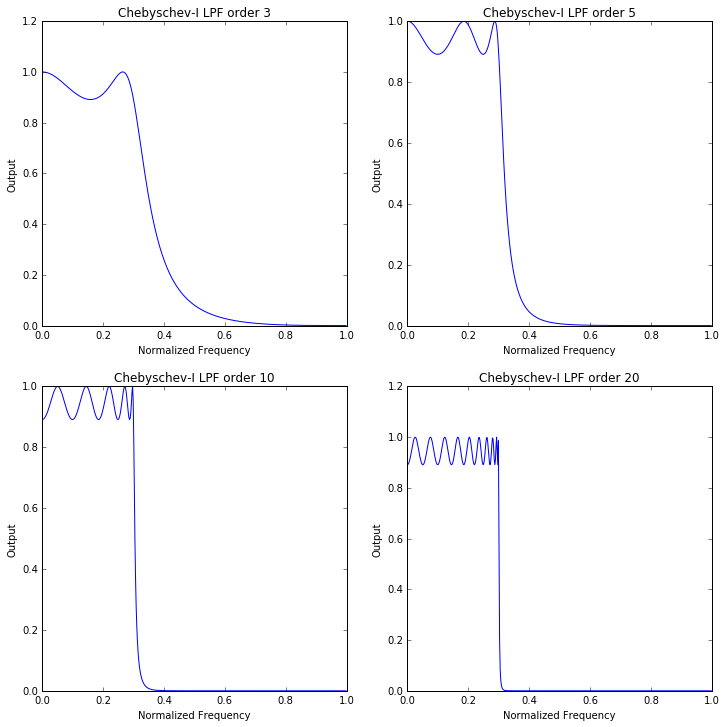

In [4]:
#Chebyschev for different orders
filter_order = [3, 5, 10, 20]
w_cutoff = 0.3
w_pass = 0.8
max_ripple_db = 1.0


cheb_b1, cheb_a1 = signal.cheby1(filter_order[0], max_ripple_db, w_cutoff, btype='lowpass')
cheb_w1, cheb_h1 = signal.freqz(cheb_b1, cheb_a1)


cheb_b2, cheb_a2 = signal.cheby1(filter_order[1], max_ripple_db, w_cutoff, btype='lowpass')
cheb_w2, cheb_h2 = signal.freqz(cheb_b2, cheb_a2)

cheb_b3, cheb_a3 = signal.cheby1(filter_order[2], max_ripple_db, w_cutoff, btype='lowpass')
cheb_w3, cheb_h3 = signal.freqz(cheb_b3, cheb_a3)

cheb_b4, cheb_a4 = signal.cheby1(filter_order[3], max_ripple_db, w_cutoff, btype='lowpass')
cheb_w4, cheb_h4 = signal.freqz(cheb_b4, cheb_a4)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Chebyschev-I LPF order ' + str(filter_order[0]))
plt.plot(cheb_w1/np.pi, np.abs(cheb_h1))
plt.ylabel('Output'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,2)
plt.title('Chebyschev-I LPF order ' + str(filter_order[1]))
plt.plot(cheb_w2/np.pi, np.abs(cheb_h2))
plt.ylabel('Output'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,3)
plt.title('Chebyschev-I LPF order ' + str(filter_order[2]))
plt.plot(cheb_w3/np.pi, np.abs(cheb_h3))
plt.ylabel('Output'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,4)
plt.title('Chebyschev-I LPF order ' + str(filter_order[3]))
plt.plot(cheb_w4/np.pi, np.abs(cheb_h4))
plt.ylabel('Output'), plt.xlabel('Normalized Frequency')

## Recursive filter 

**2.1**

<Container object of 3 artists>

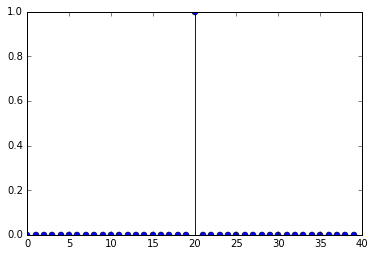

In [5]:
x_dirac = dirac(20, 40)
plt.stem(x_dirac)

**2.2**

In [23]:
def derivativeF(x, scaling = 0.5, Ts = 1):
    #Normalize scaling to Ts
    scaling = scaling/Ts
    
    #pad x with zeros on the front on the back
    x = np.pad(x, [2, 2], 'constant')
    
    #Derivative recursive filter
    alpha = scaling * Ts
    a = np.exp(-alpha)

    y_causal = np.zeros(x.shape)
    for k in range(2, x.size):
        y_causal[k] = - scaling * a * alpha * x[k - 1] + 2 * a * y_causal[k - 1] - a * a * y_causal[k - 2]
    
    y_anticausal = np.zeros(x.shape)
    #print np.arange(x.size - 2, 0, -1)
    for k in range(x.size - 3, -1, -1):
        y_anticausal[k] = scaling * a * alpha * x[k + 1] + 2 * a * y_anticausal[k + 1] - a * a * y_anticausal[k + 2]
    
    y = y_causal + y_anticausal
    #plt.title('Causal part')
    #plt.stem(y_causal)
    #plt.figure()
    #plt.title('Anticausal part')
    #plt.stem(y_anticausal)
    #plt.figure()
    
    #Remove padding and return
    return y[2:-2]


**2.3**

<Container object of 3 artists>

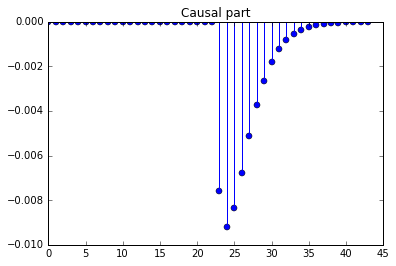

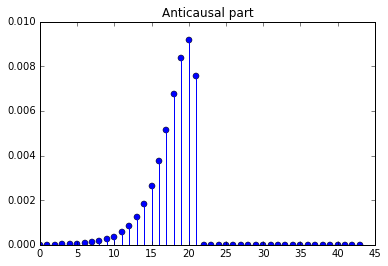

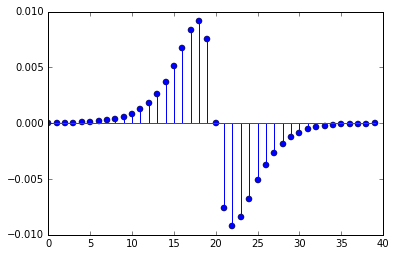

In [7]:
plt.figure()
plt.title('Anticausal and causal all together')
plt.stem(derivativeF(x_dirac,0.5,20))

**2.4**

In [12]:
def smoothingF(x, scaling = 0.5, Ts = 1):
     #Normalize scaling to Ts
    scaling = scaling/Ts
    
    #pad x with zeros on the front on the back
    #x = np.pad(x, [2, 2], 'constant')
    
    #Derivative recursive filter
    alpha = scaling * Ts
    a = np.exp(-alpha)


    y_causal = np.zeros(x.shape)
    for k in range(2, x.size):
        y_causal[k] = a * (alpha - 1) * x[k - 1] + x[k] + 2 * a * y_causal[k - 1] - a * a * y_causal[k - 2]
    
    y_anticausal = np.zeros(x.shape)
    #print np.arange(x.size - 2, 0, -1)
    for k in range(x.size - 3, -1, -1):
        y_anticausal[k] =  a * (alpha + 1) * x[k + 1] - a * a * x[k+2] + 2 * a * y_anticausal[k + 1] - a * a * y_anticausal[k + 2]
    
    y = y_causal + y_anticausal
    #plt.title('Causal part')
    #plt.stem(y_causal)
    #plt.figure()
    #plt.title('Anticausal part')
    #plt.stem(y_anticausal)
    #plt.figure()
    
    #Remove padding and return
    return y

**3.1**

<Container object of 3 artists>

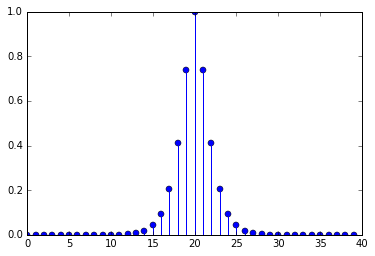

In [13]:
plt.figure()
plt.stem(smoothingF(x_dirac,0.99,1))

**3.2** , **3.3**

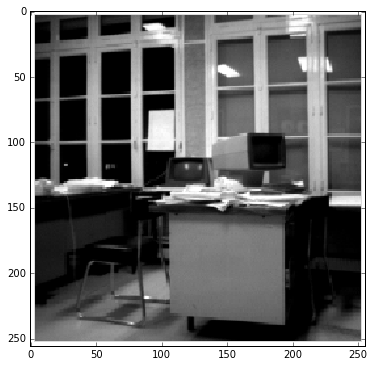

In [37]:

image = img_as_float(io.imread('../images/bureau.gif', as_grey=True))
plt.figure(figsize=(6,6))
io.imshow(image)

    

**3.4**

256


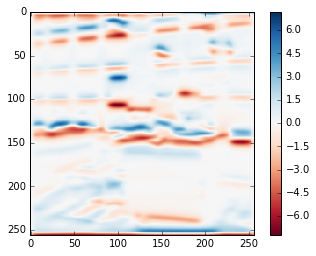

In [38]:
print len(image)

for i in range(0, image.shape[0]):
    image[i,:] = smoothingF(image[i,:],0.5,1)
    
for i in range(0, image.shape[1]):
    image[:,i] = derivativeF(image[:,i],0.5,1)


io.imshow(image)